In [1]:
import pandas as pd
import psycopg2
import os
from dotenv import load_dotenv
import numpy as np

import pandas as pd
from geopy.distance import geodesic
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px
from scipy.stats import linregress
import statsmodels.api as sm

In [2]:
load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)


query_string = "SELECT * FROM  eda.king_county_house_details d JOIN eda.king_county_house_sales s  ON s.house_id = d.id"
df = pd.read_sql(query_string, conn)



/var/folders/lk/gq8wby6x3fv6n16s31xl4dg00000gn/T/ipykernel_38256/3615274875.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_string, conn)


In [3]:
df.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id                 int64
dtype: object

In [4]:
df['log_price'] =np.log(df['price'])

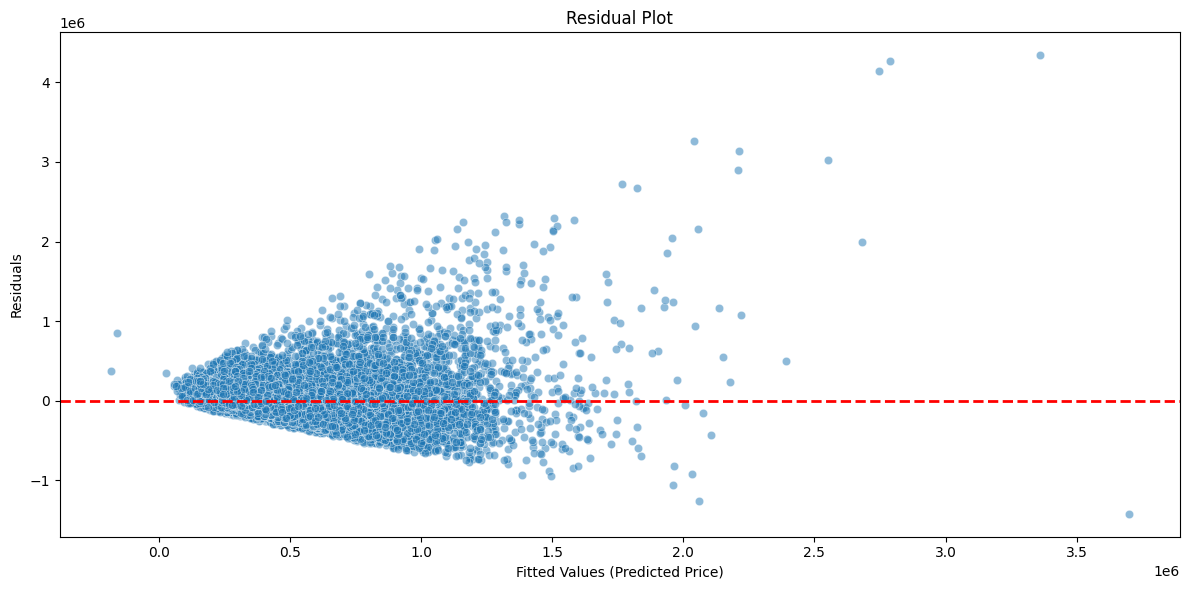

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                 1.012e+04
Date:                Thu, 10 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:29:36   Log-Likelihood:                -9653.1
No. Observations:               21597   AIC:                         1.931e+04
Df Residuals:                   21594   BIC:                         1.934e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2185      0.006   1915.967      

In [ ]:
# -------------------------------
# 1) OLS-Modell 
# -------------------------------

X = df[['sqft_living', 'sqft_lot']]
X = sm.add_constant(X)  # Intercept hinzufügen
y = df['price']

model = sm.OLS(y, X).fit(cov_type='HC3')



df['residuals'] = model.resid
df['fitted'] = model.fittedvalues



plt.figure(figsize=(12, 6))

sns.scatterplot(
    x=df['fitted'],
    y=df['residuals'],
    alpha=0.5
)


plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot')
plt.xlabel('Fitted Values (Predicted Price)')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()



X = df[['sqft_living', 'sqft_lot']]
y = df['log_price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())



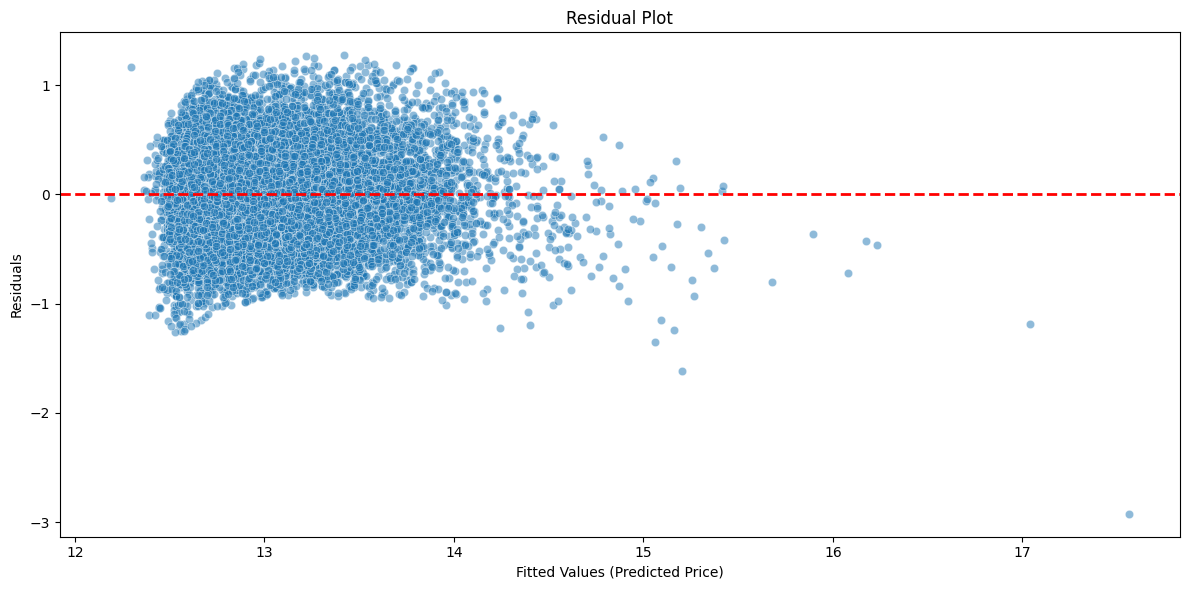

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                 1.012e+04
Date:                Thu, 10 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:29:36   Log-Likelihood:                -9653.1
No. Observations:               21597   AIC:                         1.931e+04
Df Residuals:                   21594   BIC:                         1.934e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2185      0.006   1915.967      

In [ ]:

# -------------------------------
# 1) OLS-Modell 
# -------------------------------


X = df[['sqft_living', 'sqft_lot']]
X = sm.add_constant(X)  # Intercept hinzufügen
y = df['log_price']




model = sm.OLS(y, X).fit(cov_type='HC3')


df['residuals'] = model.resid
df['fitted'] = model.fittedvalues


plt.figure(figsize=(12, 6))

sns.scatterplot(
    x=df['fitted'],
    y=df['residuals'],
    alpha=0.5
)


plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot')
plt.xlabel('Fitted Values (Predicted Price)')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()


X = df[['sqft_living', 'sqft_lot']]
y = df['log_price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

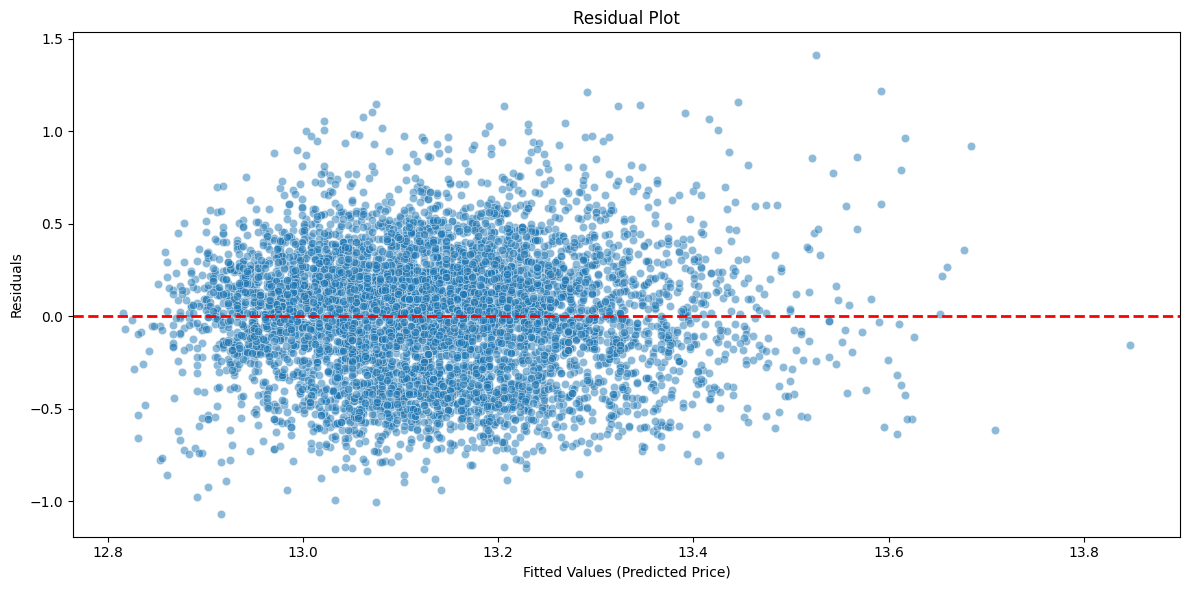

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     464.0
Date:                Thu, 10 Jul 2025   Prob (F-statistic):          3.13e-188
Time:                        22:29:36   Log-Likelihood:                -2062.3
No. Observations:                6065   AIC:                             4131.
Df Residuals:                    6062   BIC:                             4151.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.6486      0.017    761.147      

In [ ]:

df_grade_8 = df[(df['grade'] == 8)].reset_index(drop=True)

# -------------------------------
# 1) OLS-Modell 
# -------------------------------

X = df_grade_8[['sqft_living', 'sqft_lot']]
X = sm.add_constant(X)  # Intercept hinzufügen
y = df_grade_8['log_price']



model = sm.OLS(y, X).fit(cov_type='HC3')


df_grade_8['residuals'] = model.resid
df_grade_8['fitted'] = model.fittedvalues



plt.figure(figsize=(12, 6))

sns.scatterplot(
    x=df_grade_8['fitted'],
    y=df_grade_8['residuals'],
    alpha=0.5
)


plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot')
plt.xlabel('Fitted Values (Predicted Price)')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()


X = df_grade_8[['sqft_living', 'sqft_lot']]
y = df_grade_8['log_price']

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

# Zusammenfassung anzeigen
print(model.summary())

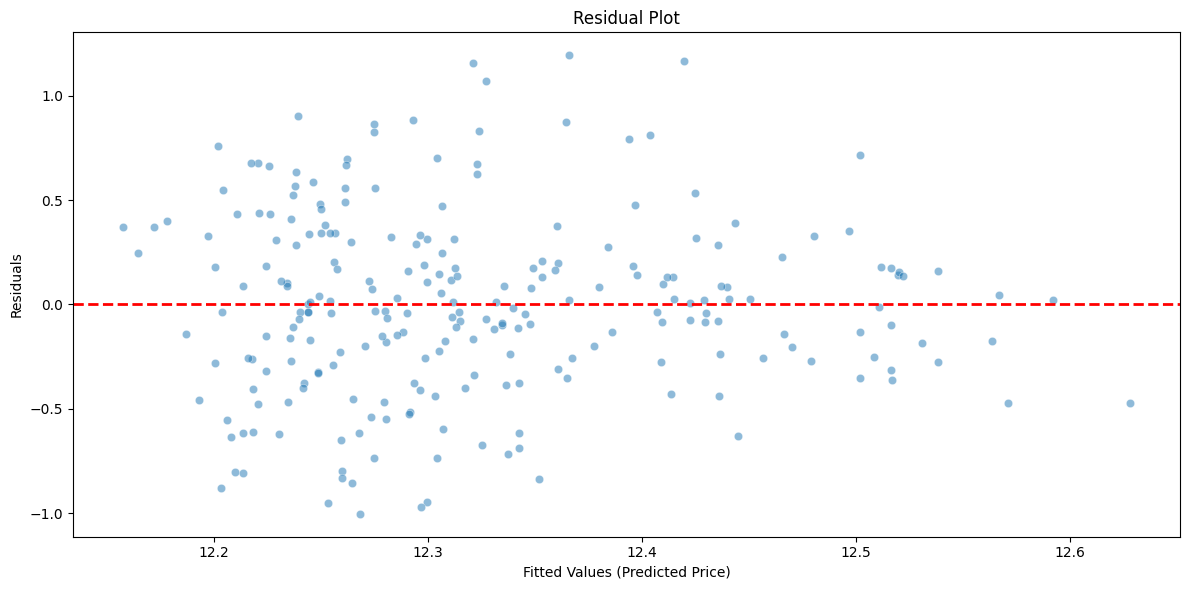

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     5.916
Date:                Thu, 10 Jul 2025   Prob (F-statistic):            0.00311
Time:                        22:29:36   Log-Likelihood:                -142.42
No. Observations:                 242   AIC:                             290.8
Df Residuals:                     239   BIC:                             301.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.0613      0.083    145.985      

In [ ]:

df_grade_5 = df[(df['grade'] == 5)].reset_index(drop=True)

# -------------------------------
# 1) OLS-Model
# -------------------------------

X = df_grade_5[['sqft_living', 'sqft_lot']]
X = sm.add_constant(X)  # Intercept hinzufügen
y = df_grade_5['log_price']



model = sm.OLS(y, X).fit(cov_type='HC3')

df_grade_5['residuals'] = model.resid
df_grade_5['fitted'] = model.fittedvalues

plt.figure(figsize=(12, 6))

sns.scatterplot(
    x=df_grade_5['fitted'],
    y=df_grade_5['residuals'],
    alpha=0.5
)


plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot')
plt.xlabel('Fitted Values (Predicted Price)')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

X = df_grade_5[['sqft_living', 'sqft_lot']]
y = df_grade_5['log_price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

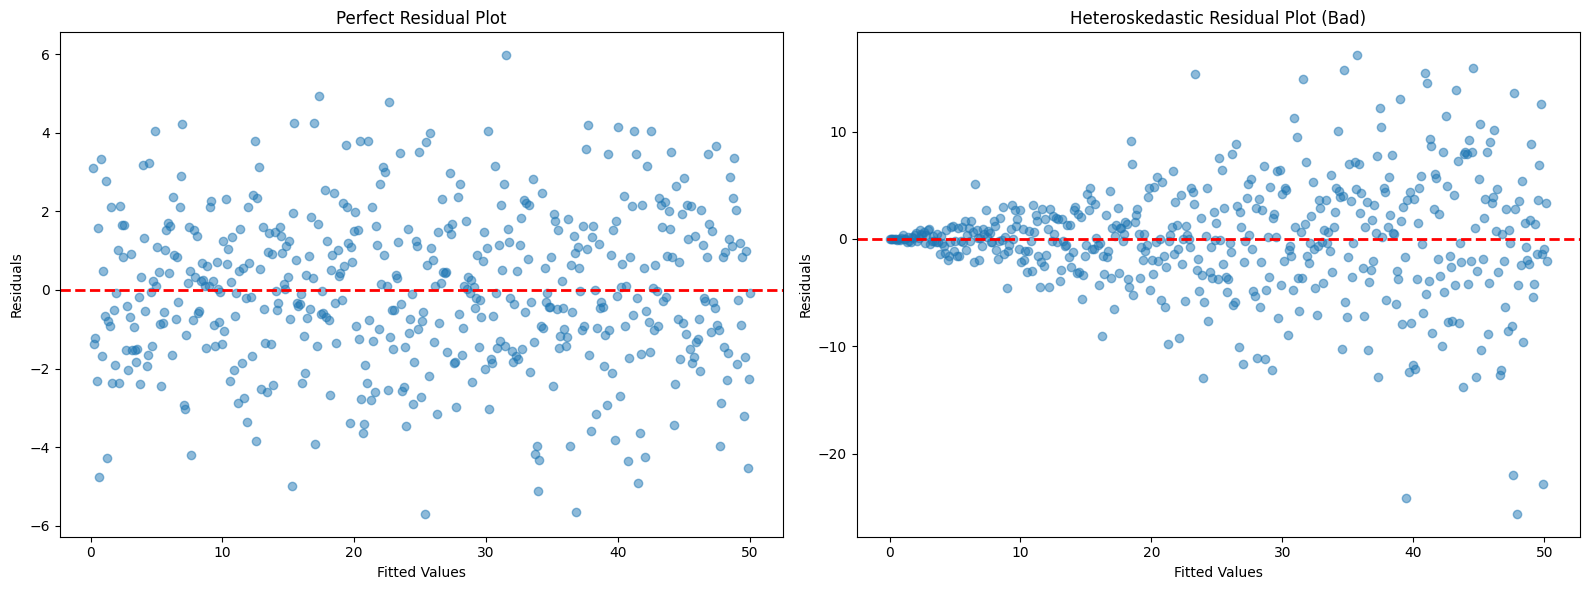

In [ ]:

np.random.seed(1)
X_perfect = np.linspace(0, 10, 500)
noise_perfect = np.random.normal(0, 2, 500)   
y_perfect = 5 * X_perfect + noise_perfect

# Fit
X_p = sm.add_constant(X_perfect)
model_p = sm.OLS(y_perfect, X_p).fit()
resid_p = model_p.resid
fitted_p = model_p.fittedvalues



X_bad = np.linspace(0, 10, 500)
noise_bad = np.random.normal(0, X_bad, 500)   
y_bad = 5 * X_bad + noise_bad


X_b = sm.add_constant(X_bad)
model_b = sm.OLS(y_bad, X_b).fit()
resid_b = model_b.resid
fitted_b = model_b.fittedvalues


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Perfect
axes[0].scatter(fitted_p, resid_p, alpha=0.5)
axes[0].axhline(0, color='red', linestyle='--', lw=2)
axes[0].set_title('Perfect Residual Plot')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')

# bad
axes[1].scatter(fitted_b, resid_b, alpha=0.5)
axes[1].axhline(0, color='red', linestyle='--', lw=2)
axes[1].set_title('Heteroskedastic Residual Plot (Bad)')
axes[1].set_xlabel('Fitted Values')
axes[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()